Fase 2: Data Understanding

Objetivo de la fase: El propósito de esta fase es explorar y entender el dataset de Goodreads, identificar posibles problemas como valores faltantes o anomalías, y comenzar a descubrir patrones iniciales que puedan influir en el análisis posterior. Además, se buscará evaluar la relación entre las variables clave (como el número de páginas, calificaciones y reseñas) para preparar el terreno de cara a las siguientes fases del proyecto.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Lo usaremos para el modelo de regresión
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.pipeline import Pipeline  # Aseguramos la importación de Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
csv_file_path = 'data/goodreads_data.csv'

In [27]:
if not os.path.exists(csv_file_path):
    kaggle.api.dataset_download_files('ishikajohari/best-books-10k-multi-genre-data', path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data


In [28]:
df = pd.read_csv(csv_file_path, delimiter=',', on_bad_lines='skip')

In [29]:
df.head(10)

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
5,5,The Little Prince,Antoine de Saint-Exupéry,A pilot stranded in the desert awakes one morn...,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,"1,924,063",https://www.goodreads.com/book/show/157993.The...
6,6,1984,George Orwell,The new novel by George Orwell is the major wo...,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,"4,201,429",https://www.goodreads.com/book/show/61439040-1984
7,7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,"4,839,642",https://www.goodreads.com/book/show/4671.The_G...
8,8,The Catcher in the Rye,J.D. Salinger,It's Christmas time and Holden Caulfield has j...,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,"3,315,881",https://www.goodreads.com/book/show/5107.The_C...
9,9,The Lord of the Rings,J.R.R. Tolkien,"One Ring to rule them all, One Ring to find th...","['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,"644,766",https://www.goodreads.com/book/show/33.The_Lor...


In [30]:
df.shape

(10000, 8)

In [31]:
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [32]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.50,7499.25,9999.0
Avg_Rating,10000.0,4.068577,0.335359,0.0,3.88,4.08,4.26,5.0


Variables con valores faltantes:
Description    77
dtype: int64

Porcentaje de valores faltantes:
Description    0.77
dtype: float64


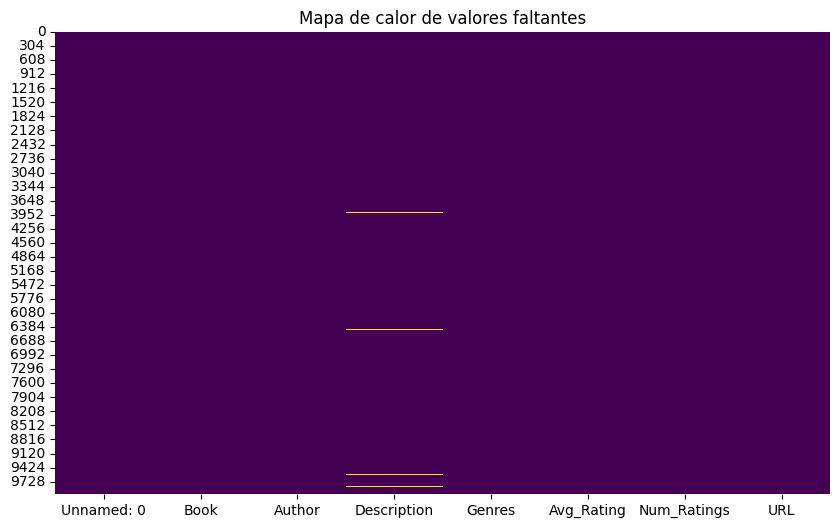

In [34]:
# Verificar si hay valores faltantes en cada columna
missing_data = df.isnull().sum()

# Filtrar solo las columnas que tienen valores faltantes
missing_data = missing_data[missing_data > 0]

# Mostrar el número de valores faltantes por columna
print("Variables con valores faltantes:")
print(missing_data)

# Calcular el porcentaje de valores faltantes
missing_percentage = (missing_data / len(df)) * 100
print("\nPorcentaje de valores faltantes:")
print(missing_percentage)

# Visualizar los valores faltantes usando un heatmap de Seaborn
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()


In [35]:
# Contar el número total de autores únicos en el DataFrame
num_authors = df['Author'].nunique()
print(num_authors)

6064


C:\Users\reyes\AppData\Local\Temp\ipykernel_39608\1414249281.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Author', y='Avg_Rating', data=top_authors_df, palette='Set2')


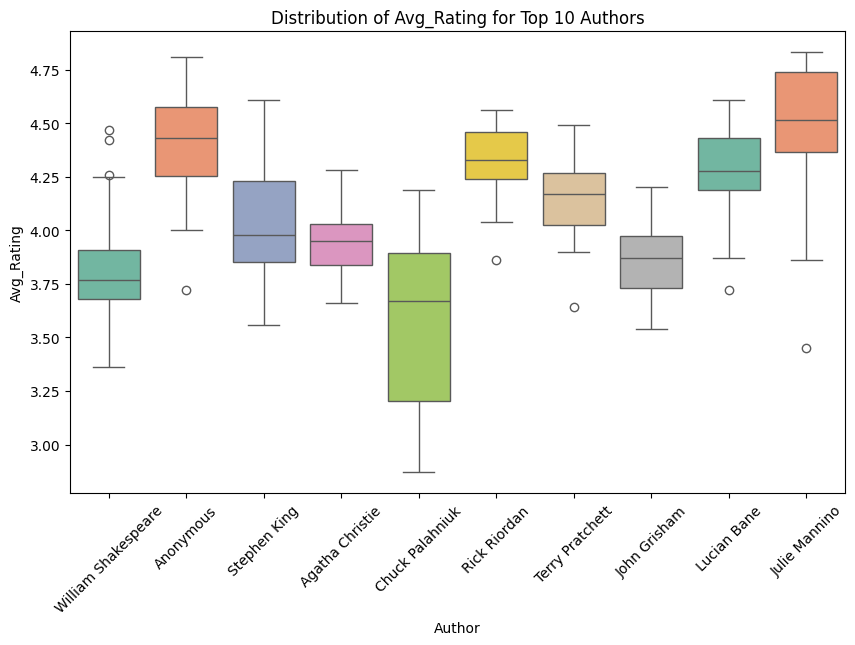

In [36]:
# Verificar los autores más comunes
top_authors = df['Author'].value_counts().head(10).index

# Filtrar los libros de los autores más comunes
top_authors_df = df[df['Author'].isin(top_authors)]

# Crear un boxplot para ver la distribución de Avg_Rating para los autores más comunes
plt.figure(figsize=(10, 6))
sb.boxplot(x='Author', y='Avg_Rating', data=top_authors_df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Avg_Rating for Top 10 Authors')
plt.show()

In [37]:
# Contar los valores en la columna 'Author'
author_counts = df['Author'].value_counts()

# Obtener el conteo de 'Anonymous'
anonymous_count = author_counts.get('Anonymous', 0)
print(f"Número de autores 'Anonymous': {anonymous_count}")

Número de autores 'Anonymous': 28


Analisis exploratorio para la tarea de regresión

Matriz de Correlación

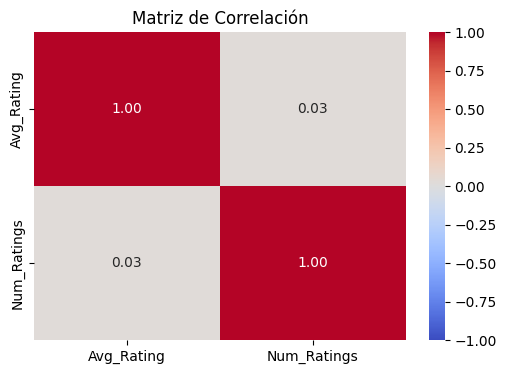

In [38]:
# Asegurarse de que 'Num_Ratings' es tipo string y eliminar comas
df['Num_Ratings'] = df['Num_Ratings'].astype(str).str.replace(',', '')

# Convertir 'Num_Ratings' a tipo numérico, ignorando errores en caso de que haya valores no convertibles
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')

# Seleccionar solo las columnas numéricas relevantes
df_numeric = df[['Avg_Rating', 'Num_Ratings']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(6, 4))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Existe una correlación entre Num_Ratings y Avg_Rating, esto significa que un alto numero de calificaciones esta asociado con un alto numero de reseñas, los lectores al hacer una calificación tambien son propensos a escribir una reseña.

Grafico de dispersión: Num_ratings vs Avg_Rating 

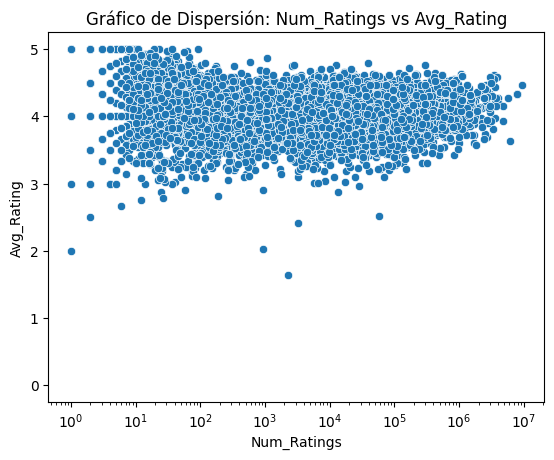

In [39]:
# Seleccionar columnas numéricas relevantes
numeric_data = df[['Avg_Rating', 'Num_Ratings']]

# Gráfico de dispersión entre Num_Ratings y Avg_Rating
sb.scatterplot(x='Num_Ratings', y='Avg_Rating', data=numeric_data)
plt.title('Gráfico de Dispersión: Num_Ratings vs Avg_Rating')
plt.xscale('log')  # Escala logarítmica para mejorar la visualización

Histograma de Avg_rating

Text(0.5, 1.0, 'Histograma de Avg_Rating')

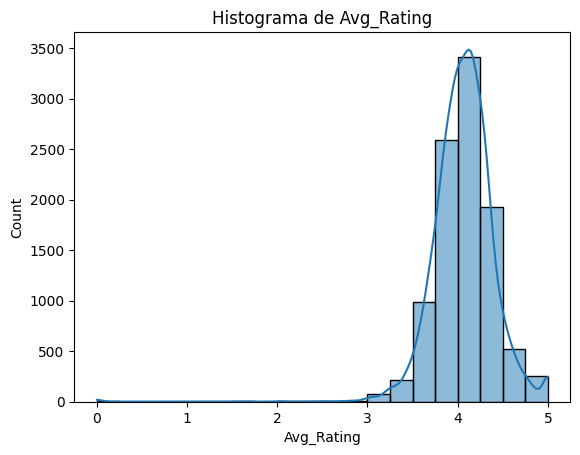

In [40]:
# Histograma de Avg_Rating
sb.histplot(df['Avg_Rating'], bins=20, kde=True)
plt.title('Histograma de Avg_Rating')

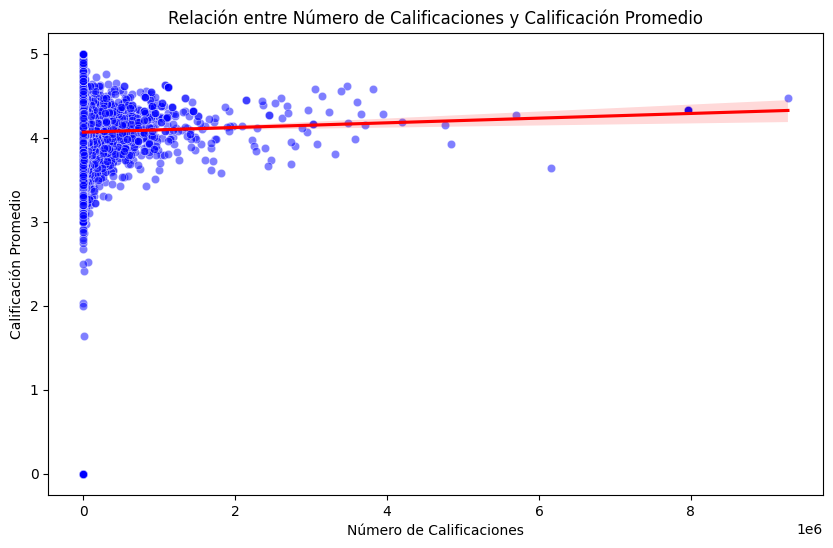

In [41]:
# Convertir las columnas relevantes a formato numérico, si es necesario
df['Avg_Rating'] = pd.to_numeric(df['Avg_Rating'], errors='coerce')
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')

# Crear el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Num_Ratings', y='Avg_Rating', data=df, color='blue', alpha=0.5)
sb.regplot(x='Num_Ratings', y='Avg_Rating', data=df, scatter=False, color='red')

# Títulos y etiquetas
plt.title('Relación entre Número de Calificaciones y Calificación Promedio')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')

# Mostrar el gráfico
plt.show()


Se confirma la alta correlación con la linea roja y el area sombreada, indicando una tendencia positiva.

In [42]:
#Verificamos valores faltantes en el dataset
total_missing = df.isnull().sum().sum()
print(f'Total de valores faltantes: {total_missing}')

Total de valores faltantes: 77


Analisis exploratorio para la tarea de clasificación

In [43]:
# Verificar que todas las entradas de la columna 'Genres' sean cadenas de texto
df['Genres'] = df['Genres'].astype(str)

# Aplicar eval() para convertir las cadenas de listas a listas reales
df['Genres'] = df['Genres'].apply(lambda x: eval(x))

# Extraer el género principal de cada libro (primer elemento de la lista)
df['Main_Genre'] = df['Genres'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

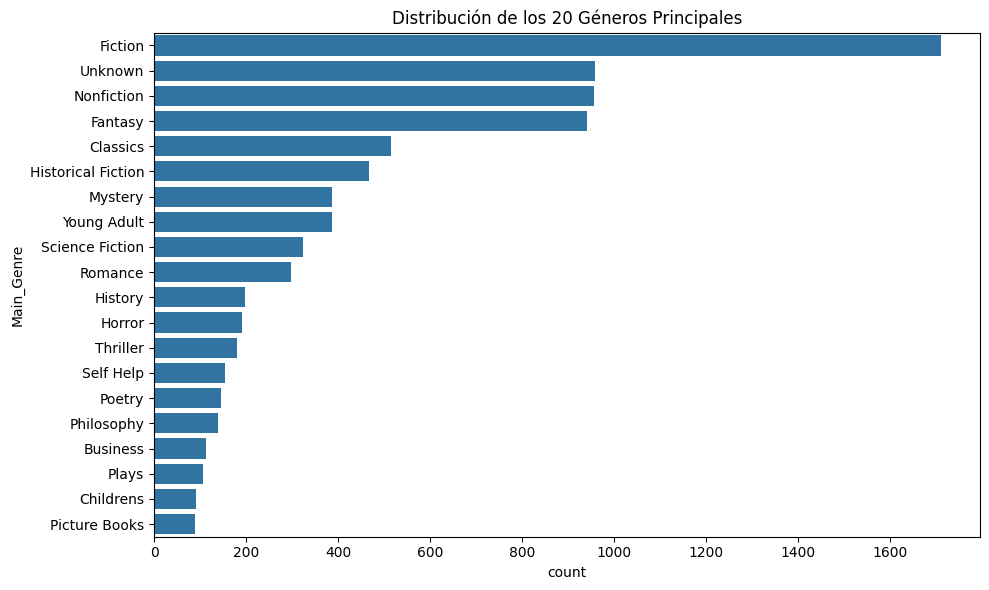

In [44]:
# Mostrar solo los 20 géneros más comunes
top_genres = df['Main_Genre'].value_counts().nlargest(20).index

# Filtrar el DataFrame para solo los géneros principales
df_top_genres = df[df['Main_Genre'].isin(top_genres)]

# Gráfico con los 20 géneros más comunes
plt.figure(figsize=(10, 6))
sb.countplot(y='Main_Genre', data=df_top_genres, order=df_top_genres['Main_Genre'].value_counts().index)
plt.title('Distribución de los 20 Géneros Principales')
plt.tight_layout()
plt.show()

Utilizamos los 20 géneros principales, ya que, existe una gran cantidad de generos. La moda de los libros de este CSV es de Fiction.

In [45]:
# Contar los valores nulos en la columna 'Genres'
missing_genres_count = df['Genres'].isnull().sum()
print(f"Número de géneros faltantes: {missing_genres_count}")

Número de géneros faltantes: 0


In [46]:
# Contar cuántas entradas son listas vacías
empty_genres_count = df[df['Genres'].apply(lambda x: isinstance(x, list) and len(x) == 0)].shape[0]
print(f"Número de listas vacías en 'Genres': {empty_genres_count}")

# Contar cuántas entradas son cadenas vacías
empty_strings_count = df[df['Genres'].apply(lambda x: x == '')].shape[0]
print(f"Número de cadenas vacías en 'Genres': {empty_strings_count}")

Número de listas vacías en 'Genres': 960
Número de cadenas vacías en 'Genres': 0


In [47]:
# Contar cuántas veces aparece 'Unknown' en la columna 'Main_Genre'
unknown_count = df[df['Main_Genre'] == 'Unknown'].shape[0]
print(f"Número de géneros 'Unknown': {unknown_count}")

Número de géneros 'Unknown': 960


Histograma: Distribución de clasificaciones promedio

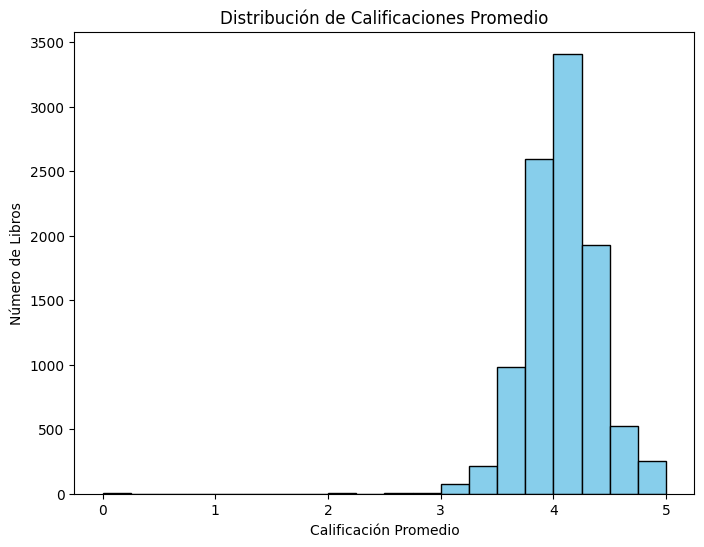

In [48]:
# Gráfico 1: Distribución de las calificaciones promedio (avg_rating)
plt.figure(figsize=(8,6))
df['Avg_Rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Libros')
plt.grid(False)
plt.show()

La mayoria de los libros tienen una calificación promedio entre 3 a 4.5, lo que indica que el conjunto de libros esta bien valorado por los lectores.

Gráfico de Cajas

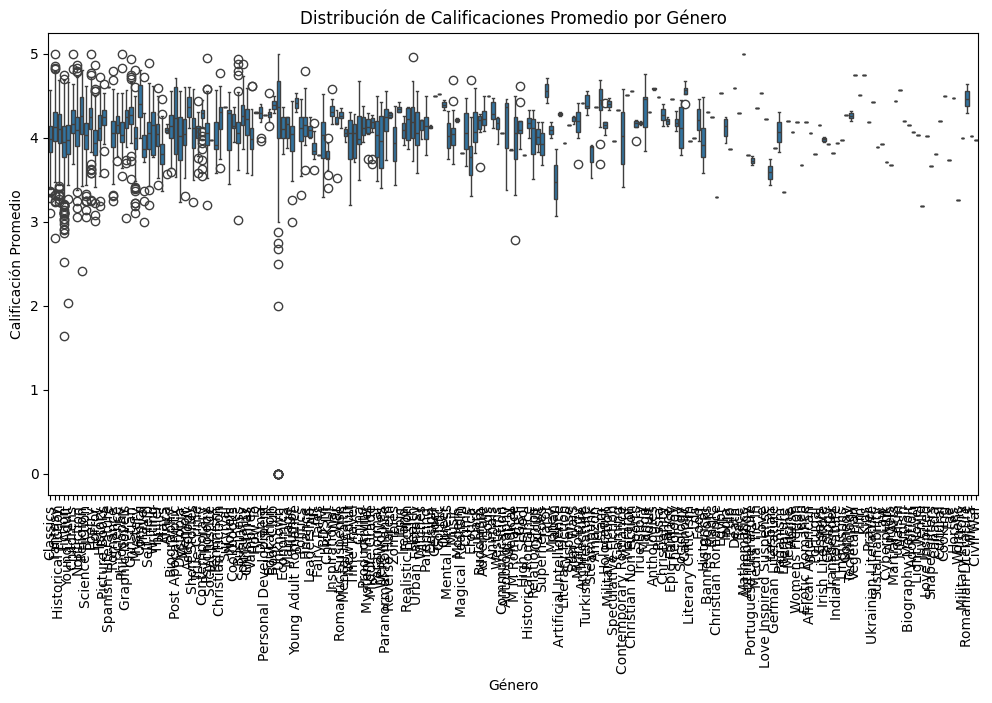

In [49]:
# Convertir todos los valores en 'Genres' a cadenas de texto, luego extraer el primer género
df['Primary_Genre'] = df['Genres'].apply(lambda x: str(x[0]) if isinstance(x, list) and len(x) > 0 else (str(x).split(',')[0] if isinstance(x, str) else 'Unknown'))

# Gráfico de cajas para visualizar la distribución de Avg_Rating por Primary_Genre
plt.figure(figsize=(12, 6))
sb.boxplot(x='Primary_Genre', y='Avg_Rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de Calificaciones Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio')

# Mostrar el gráfico
plt.show()

La mayoria de cantidad de datos se encuentra entre 3 a 5 calificacion promedio. 